GROUP 10 ML CASE STUDY

This data set consists of three types of entities: (a) the
      specification of an auto in terms of various characteristics, (b)
      its assigned insurance risk rating, (c) its normalized losses in use
      as compared to other cars.  The second rating corresponds to the
      degree to which the auto is more risky than its price indicates.
      Cars are initially assigned a risk factor symbol associated with its
      price.   Then, if it is more risky (or less), this symbol is
      adjusted by moving it up (or down) the scale.  Actuarians call this
      process "symboling".  A value of +3 indicates that the auto is
      risky, -3 that it is probably pretty safe.
      The third factor is the relative average loss payment per insured
      vehicle year.  This value is normalized for all autos within a
      particular size classification (two-door small, station wagons,
      sports/speciality, etc...), and represents the average loss per car
      per year.

Missing Attribute Values: (denoted by "?")
   Attribute #:   Number of instances missing a value:
   2.Normalized-losses             41
   6. Num of doors                  2
   19.bore                          4
   20.stroke                        4
   22.horsepower                    2
   23.peak rpm                      2
   26.price                         4


In [1]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import mean_squared_error

In [3]:
df=pd.read_csv('imports-85.data',header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


In [4]:
columns=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

In [5]:
df.columns=columns

In [6]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


In [7]:
df=df.replace(to_replace='?',value=np.nan)

In [8]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,NaN


In [9]:
df['normalized-losses']=df['normalized-losses'].astype('float')

In [10]:
df['normalized-losses'].mean()

122.0

In [11]:
df['normalized-losses']=df['normalized-losses'].fillna(df['normalized-losses'].mean())
df['normalized-losses']

0      122.0
1      122.0
2      122.0
3      164.0
4      164.0
5      122.0
6      158.0
7      122.0
8      158.0
9      122.0
10     192.0
11     192.0
12     188.0
13     188.0
14     122.0
15     122.0
16     122.0
17     122.0
18     121.0
19      98.0
20      81.0
21     118.0
22     118.0
23     118.0
24     148.0
25     148.0
26     148.0
27     148.0
28     110.0
29     145.0
       ...  
175     65.0
176     65.0
177     65.0
178    197.0
179    197.0
180     90.0
181    122.0
182    122.0
183    122.0
184     94.0
185     94.0
186     94.0
187     94.0
188     94.0
189    122.0
190    256.0
191    122.0
192    122.0
193    122.0
194    103.0
195     74.0
196    103.0
197     74.0
198    103.0
199     74.0
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 205, dtype: float64

In [12]:
df=df.dropna()

In [13]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16430


In [14]:
df['price']=df['price'].astype('float')

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.0
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.0
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.0
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16430.0


{'whiskers': [<matplotlib.lines.Line2D at 0x20872feb978>,
 'caps': [<matplotlib.lines.Line2D at 0x20872febda0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20872feb518>],
 'medians': [<matplotlib.lines.Line2D at 0x2087368d6d8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2087368da20>],
 'means': []}

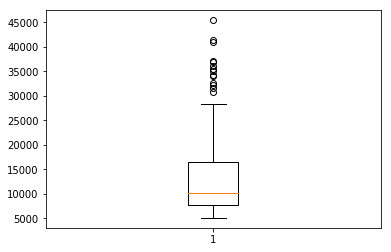

In [16]:
plt.boxplot(df['price'].astype('float'))

In [17]:
df['wheel-base']=df['wheel-base'].astype('float')
df['length']=df['length'].astype('float')
df['width']=df['width'].astype('float')
df['height']=df['height'].astype('float')
df['curb-weight']=df['curb-weight'].astype('float')
df['bore']=df['bore'].astype('float')
df['stroke']=df['stroke'].astype('float')
df['compression-ratio']=df['compression-ratio'].astype('float')
df['horsepower']=df['horsepower'].astype('float')
df['peak-rpm']=df['peak-rpm'].astype('float')
df['city-mpg']=df['city-mpg'].astype('float')
df['highway-mpg']=df['highway-mpg'].astype('float')
df['price']=df['price'].astype('float')

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.

In [18]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
print(iqr)

symboling               2.00
normalized-losses      39.00
wheel-base              7.90
length                 18.30
width                   2.80
height                  3.70
curb-weight           807.00
engine-size            48.00
bore                    0.44
stroke                  0.30
compression-ratio       0.90
horsepower             46.00
peak-rpm              700.00
city-mpg               11.00
highway-mpg             9.00
price                8777.00
dtype: float64


In [19]:
q1['price']

7738.0

In [20]:
df[df['price']<q1['price']].shape

(48, 26)

In [21]:
df[df['price']<q3['price']].shape

(144, 26)

In [22]:
df.shape

(193, 26)

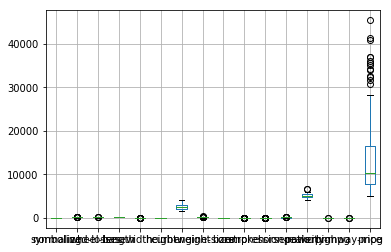

In [23]:
df.boxplot()

In [24]:
print(((df < (q1 - 1.5 * iqr)) |(df > (q3 + 1.5 * iqr))).sum())

aspiration            0
body-style            0
bore                  0
city-mpg              2
compression-ratio    26
curb-weight           0
drive-wheels          0
engine-location       0
engine-size           7
engine-type           0
fuel-system           0
fuel-type             0
height                0
highway-mpg           3
horsepower            5
length                0
make                  0
normalized-losses     6
num-of-cylinders      0
num-of-doors          0
peak-rpm              2
price                14
stroke               18
symboling             0
wheel-base            3
width                 7
dtype: int64


In [25]:
df['engine-location'].value_counts()

front    190
rear       3
Name: engine-location, dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le_1=LabelEncoder()
le_2=LabelEncoder()
le_3=LabelEncoder()
le_4=LabelEncoder()
le_5=LabelEncoder()
le_6=LabelEncoder()
le_7=LabelEncoder()
le_8=LabelEncoder()
le_9=LabelEncoder()
le_10=LabelEncoder()

In [28]:
df['make']=le_1.fit_transform(df['make'])
df['fuel-type']=le_2.fit_transform(df['fuel-type'])
df['aspiration']=le_3.fit_transform(df['aspiration'])
df['num-of-doors']=le_4.fit_transform(df['num-of-doors'])
df['body-style']=le_5.fit_transform(df['body-style'])
df['drive-wheels']=le_6.fit_transform(df['drive-wheels'])
df['engine-location']=le_7.fit_transform(df['engine-location'])
df['engine-type']=le_8.fit_transform(df['engine-type'])
df['num-of-cylinders']=le_9.fit_transform(df['num-of-cylinders'])
df['fuel-system']=le_10.fit_transform(df['fuel-system'])

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.

In [29]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,0,1,0,1,0,2,0,88.6,...,130,4,3.47,2.68,9.00,111.0,5000.0,21.0,27.0,13495.0
1,3,122.0,0,1,0,1,0,2,0,88.6,...,130,4,3.47,2.68,9.00,111.0,5000.0,21.0,27.0,16500.0
2,1,122.0,0,1,0,1,2,2,0,94.5,...,152,4,2.68,3.47,9.00,154.0,5000.0,19.0,26.0,16500.0
3,2,164.0,1,1,0,0,3,1,0,99.8,...,109,4,3.19,3.40,10.00,102.0,5500.0,24.0,30.0,13950.0
4,2,164.0,1,1,0,0,3,0,0,99.4,...,136,4,3.19,3.40,8.00,115.0,5500.0,18.0,22.0,17450.0
5,2,122.0,1,1,0,1,3,1,0,99.8,...,136,4,3.19,3.40,8.50,110.0,5500.0,19.0,25.0,15250.0
6,1,158.0,1,1,0,0,3,1,0,105.8,...,136,4,3.19,3.40,8.50,110.0,5500.0,19.0,25.0,17710.0
7,1,122.0,1,1,0,0,4,1,0,105.8,...,136,4,3.19,3.40,8.50,110.0,5500.0,19.0,25.0,18920.0
8,1,158.0,1,1,1,0,3,1,0,105.8,...,131,4,3.13,3.40,8.30,140.0,5500.0,17.0,20.0,23875.0
10,2,192.0,2,1,0,1,3,2,0,101.2,...,108,4,3.50,2.80,8.80,101.0,5800.0,23.0,29.0,16430.0


In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
onehotencoder=OneHotEncoder(categorical_features=[2,3,4,5,6,7,8,14,15,17])

In [32]:
#df.corr()

In [33]:
# corr=df.corr()

In [34]:
# sns.heatmap(corr)

In [35]:
# corr['price']

In [36]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

In [37]:
X = onehotencoder.fit_transform(X).toarray()

C:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [38]:
X.shape

(193, 70)

In [39]:
Y

array([13495., 16500., 16500., 13950., 17450., 15250., 17710., 18920.,
       23875., 16430., 16925., 20970., 21105., 24565., 30760., 41315.,
       36880.,  5151.,  6295.,  6575.,  5572.,  6377.,  7957.,  6229.,
        6692.,  7609.,  8921., 12964.,  6479.,  6855.,  5399.,  6529.,
        7129.,  7295.,  7295.,  7895.,  9095.,  8845., 10295., 12945.,
       10345.,  6785., 11048., 32250., 35550., 36000.,  5195.,  6095.,
        6795.,  6695.,  7395.,  8845.,  8495., 10595., 10245., 11245.,
       18280., 18344., 25552., 28248., 28176., 31600., 34184., 35056.,
       40960., 45400., 16503.,  5389.,  6189.,  6669.,  7689.,  9959.,
        8499., 12629., 14869., 14489.,  6989.,  8189.,  9279.,  9279.,
        5499.,  7099.,  6649.,  6849.,  7349.,  7299.,  7799.,  7499.,
        7999.,  8249.,  8949.,  9549., 13499., 14399., 13499., 17199.,
       19699., 18399., 11900., 13200., 12440., 13860., 15580., 16900.,
       16695., 17075., 16630., 17950., 18150.,  5572.,  7957.,  6229.,
      

In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [41]:
X_sc=sc.fit_transform(X)

In [42]:
X_sc

array([[ 7.95822426, -0.17912443, -0.2079501 , ..., -0.21335937,
        -0.67905347, -0.55705817],
       [ 7.95822426, -0.17912443, -0.2079501 , ..., -0.21335937,
        -0.67905347, -0.55705817],
       [ 7.95822426, -0.17912443, -0.2079501 , ..., -0.21335937,
        -0.99296322, -0.70413372],
       ...,
       [-0.12565617, -0.17912443, -0.2079501 , ...,  0.8562084 ,
        -1.14991809, -1.14536038],
       [-0.12565617, -0.17912443, -0.2079501 , ..., -0.64118648,
         0.1057209 , -0.55705817],
       [-0.12565617, -0.17912443, -0.2079501 , ...,  0.64229484,
        -0.99296322, -0.85120928]])

In [43]:
sc_Y=StandardScaler()

In [44]:
Y_sc=sc_Y.fit_transform(Y.reshape((-1, 1)))

In [45]:
df.corr()['price']

symboling           -0.084835
normalized-losses    0.138700
make                -0.165066
fuel-type           -0.115440
aspiration           0.186073
num-of-doors        -0.046460
body-style          -0.070059
drive-wheels         0.596227
engine-location      0.330848
wheel-base           0.584951
length               0.695928
width                0.754649
height               0.136234
curb-weight          0.835368
engine-type          0.144069
num-of-cylinders     0.010184
engine-size          0.888778
fuel-system          0.506011
bore                 0.546295
stroke               0.096007
compression-ratio    0.074483
horsepower           0.812453
peak-rpm            -0.103835
city-mpg            -0.706618
highway-mpg         -0.719178
price                1.000000
Name: price, dtype: float64

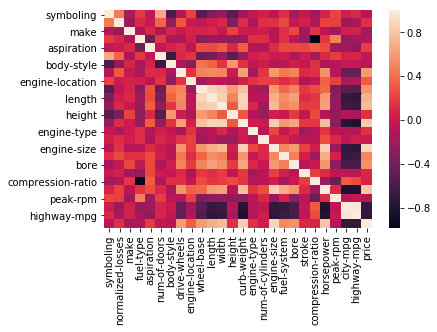

In [46]:
sns.heatmap(df.corr())

In [47]:
from sklearn.linear_model import LinearRegression

In [68]:
reg=LinearRegression()

In [69]:
reg.fit(X_sc,Y_sc)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [70]:
Y_pred_r=reg.predict(X_sc)

In [71]:
Y_pred_r=sc_Y.inverse_transform(Y_pred_r)

In [72]:
Y_pred_r

array([[15052.65278175],
       [15052.65278175],
       [17101.19366955],
       [13098.65993492],
       [17432.11181296],
       [14997.49975784],
       [18692.7523593 ],
       [19480.65270076],
       [21639.49963636],
       [18661.23634564],
       [19780.05483051],
       [22230.42489246],
       [22758.31812123],
       [23404.39640123],
       [31756.14002072],
       [33221.63465583],
       [35963.52784412],
       [ 4053.56401495],
       [ 5881.49280714],
       [ 6732.42517592],
       [ 5503.30064324],
       [ 5377.23658861],
       [ 8717.9340364 ],
       [ 5976.04084812],
       [ 6543.32909397],
       [ 6543.32909397],
       [ 7756.69561982],
       [12846.53182566],
       [ 4305.69212422],
       [ 7079.10132616],
       [ 5692.39672519],
       [ 8560.35396811],
       [ 8623.38599543],
       [ 7677.90558567],
       [ 7283.95541494],
       [ 9411.28633689],
       [ 9726.44647347],
       [ 8875.51410469],
       [ 7717.30060275],
       [10809.80944298],


In [73]:
Y

array([13495., 16500., 16500., 13950., 17450., 15250., 17710., 18920.,
       23875., 16430., 16925., 20970., 21105., 24565., 30760., 41315.,
       36880.,  5151.,  6295.,  6575.,  5572.,  6377.,  7957.,  6229.,
        6692.,  7609.,  8921., 12964.,  6479.,  6855.,  5399.,  6529.,
        7129.,  7295.,  7295.,  7895.,  9095.,  8845., 10295., 12945.,
       10345.,  6785., 11048., 32250., 35550., 36000.,  5195.,  6095.,
        6795.,  6695.,  7395.,  8845.,  8495., 10595., 10245., 11245.,
       18280., 18344., 25552., 28248., 28176., 31600., 34184., 35056.,
       40960., 45400., 16503.,  5389.,  6189.,  6669.,  7689.,  9959.,
        8499., 12629., 14869., 14489.,  6989.,  8189.,  9279.,  9279.,
        5499.,  7099.,  6649.,  6849.,  7349.,  7299.,  7799.,  7499.,
        7999.,  8249.,  8949.,  9549., 13499., 14399., 13499., 17199.,
       19699., 18399., 11900., 13200., 12440., 13860., 15580., 16900.,
       16695., 17075., 16630., 17950., 18150.,  5572.,  7957.,  6229.,
      

In [74]:
mean_squared_error(Y,Y_pred_r)

2335168.701404967

In [55]:
#algorithm 1 SVM

In [56]:
from sklearn.svm import SVR

In [57]:
svr=SVR(kernel='rbf')
svr.fit(X_sc,Y_sc)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [58]:
Y_pred=sc_Y.inverse_transform(svr.predict(X_sc))

In [59]:
Y_pred

array([15695.30008174, 15695.30008174, 17002.81548838, 13143.3669781 ,
       17090.27508544, 15877.17427951, 18518.91139434, 18284.46369948,
       22273.42365673, 17153.91143395, 17736.03866941, 21777.67935811,
       21912.12981103, 25020.5805438 , 29957.43962942, 30710.27422018,
       32502.79227562, 10410.59455237,  7099.14730411,  7381.986562  ,
        6314.86605972,  6320.66440798,  8762.35005345,  7036.13979695,
        7180.21433391,  7180.21433391,  9727.47551725, 13770.51159885,
        7287.5582912 ,  7151.86871569,  6071.31236606,  7089.59354332,
        7096.29467614,  8099.72975836,  8098.36679159,  8490.07820424,
        8538.58482737,  9650.96130669,  9486.80024907, 12135.55073197,
        9881.39712359,  8377.0266111 , 11854.35011255, 31443.53013806,
       31471.69363446, 27278.04241622,  6237.98946787,  5987.58851885,
        5989.80444842,  6943.37308611,  6965.86866394,  9650.06663436,
       10243.04822059,  9650.06663436, 10243.04822059, 10441.17164957,
      

In [60]:
np.sqrt(mean_squared_error(Y,Y_pred))

1799.49734975556

In [61]:
#decision tree

In [62]:
from sklearn.tree import DecisionTreeRegressor
regressor1=DecisionTreeRegressor(random_state=0)
regressor1.fit(X_sc,Y_sc)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [63]:
Y_pred_2=sc_Y.inverse_transform(regressor1.predict(X_sc))

In [64]:
np.sqrt(mean_squared_error(Y_pred_2,Y))

223.88723105165974

In [65]:
#visualization

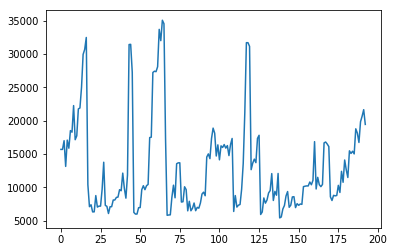

In [66]:
plt.plot(Y_pred)

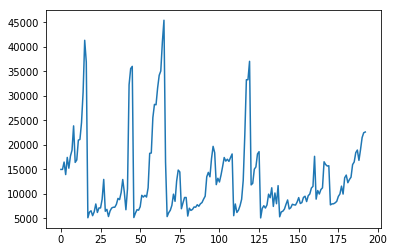

In [67]:
plt.plot(Y_pred_2)